In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#Read in CSV Spreadsheets
hawaii_measurements = pd.read_csv("resources/clean_hawaii_measurements.csv")
hawaii_stations = pd.read_csv("resources/clean_hawaii_stations.csv")

In [6]:
#Remove the extra index column(s)
hawaii_measurements = hawaii_measurements.rename(columns={"Unnamed: 0":"index"}).set_index('index')
hawaii_stations = hawaii_stations.rename(columns={"Unnamed: 0":"index"}).set_index('index')

In [7]:
measurements_dates = hawaii_measurements['date']
measurements_dates[0]

'1/1/10'

In [8]:

# View the dataframes
print(hawaii_measurements.head())
print(hawaii_stations.head())

           station    date  prcp  tobs
index                                 
0      USC00519397  1/1/10  0.08    65
1      USC00519397  1/2/10  0.00    63
2      USC00519397  1/3/10  0.00    74
3      USC00519397  1/4/10  0.00    76
5      USC00519397  1/7/10  0.06    70
           station                                    name  latitude  \
index                                                                  
0      USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1      USC00513117                    KANEOHE 838.1, HI US   21.4234   
2      USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3      USC00517948                       PEARL CITY, HI US   21.3934   
4      USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

       longitude  elevation  
index                        
0      -157.8168        3.0  
1      -157.8015       14.6  
2      -157.8374        7.0  
3      -157.9751       11.9  
4      -158.0111      306.6  


In [9]:
# Connect to the SQL Engine
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [10]:
# Debug statement to clear the dataframes so I don't get errors when trying to run this script several times:
engine.execute("DELETE FROM hawaii_measurements;")
engine.execute("DELETE FROM hawaii_stations;")

In [11]:
# Push the dataframes to the databases: 
hawaii_measurements.to_sql(name="hawaii_measurements", con=conn, if_exists='append')
hawaii_stations.to_sql(name="hawaii_stations", con=conn, if_exists='append')

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found
Base.classes.keys()


[]

In [18]:
# Save references to each table
Measurement = Base.classes.hawaii_measurements
Station = Base.classes.hawaii_stations

AttributeError: hawaii_measurements

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23').order_by(Measurements.date)
data_list = []
for row in data:
    data_list.append(row)
    
# Calculate the date 1 year ago from today
date_prcp = pd.DataFrame(data= data_list)
date_prcp = date_prcp.sort_values("date", ascending=True)
date_prcp = date_prcp.set_index("date")
date_prcp.head()

# Perform a query to retrieve the data and precipitation scores
plt.figure(figsize=(5,3))
date_prcp.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
locs, labels = plt.xticks([0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000] , ["two", "3", "4", "5", "6", "7", "8","9","10",])
plt.show()
for label in labels:
    print(label)
    
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


NameError: name 'Measurements' is not defined

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurements_df = pd.read_sql('SELECT * FROM hawaii_measurements', con=conn)
measurements_df.head()

,index,station,date,prcp,tobs
0,0,USC00519397,1/1/10,0.08,65
1,1,USC00519397,1/2/10,0.00,63
2,2,USC00519397,1/3/10,0.00,74
3,3,USC00519397,1/4/10,0.00,76
4,5,USC00519397,1/7/10,0.06,70


In [22]:
# How many stations are available in this dataset?
number_of_stations = measurements_df['station'].nunique()
print(f"The number of stations is: {number_of_stations}")


The number of stations is: 9


In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.
print(measurements_df['station'].value_counts())
most_observed_station = measurements_df['station'].value_counts().index[0]
observations = measurements_df['station'].value_counts()[0]
print(f"The station with the most observations is stations number: {most_observed_station} with {observations} observations.")

USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64
The station with the most observations is stations number: USC00519281 with 2772 observations.


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#TODO

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last12months_df = pd.read_sql("SELECT * FROM hawaii_measurements WHERE date >= '2016-08-23'", con=conn)
last12months_df.head()

,index,station,date,prcp,tobs
0,52,USC00519397,3/1/10,0.01,70
1,53,USC00519397,3/2/10,0.00,72
2,54,USC00519397,3/3/10,0.00,73
3,55,USC00519397,3/4/10,0.12,70
4,56,USC00519397,3/5/10,0.08,71


The minimum temperature for your date range is: nan
The maximum temperature for your date range is: nan
The average temperature for your date range is: nan


<IPython.core.display.Javascript object>


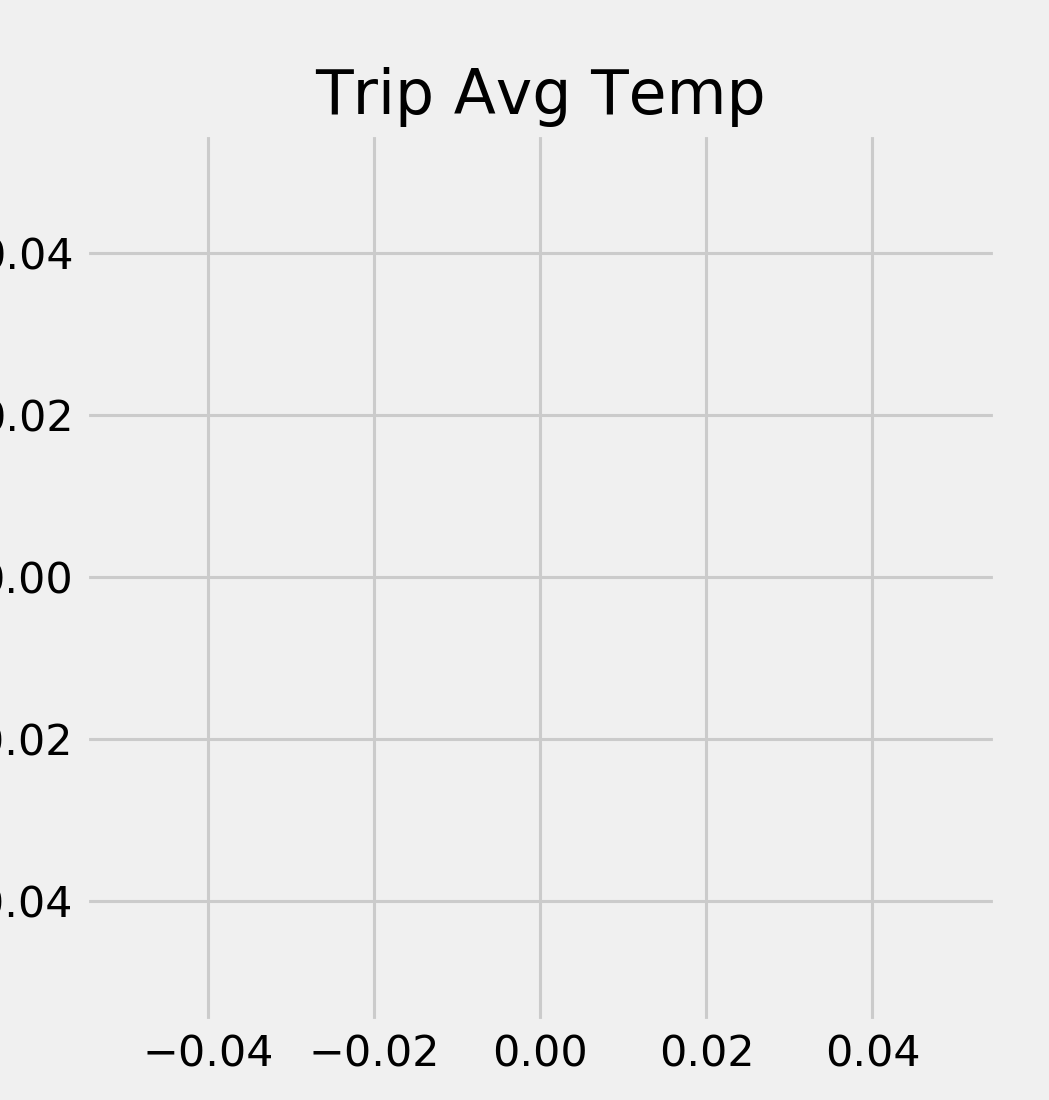

NameError: name 'Measurement' is not defined

In [26]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    dataframe = pd.read_sql(f"SELECT * FROM hawaii_measurements WHERE (date >= '{start_date}' AND date <= '{end_date}')", con=conn)
    min_temp = dataframe['tobs'].min()
    max_temp = dataframe['tobs'].max()
    mean_temp = dataframe['tobs'].mean()
    
    print(f"The minimum temperature for your date range is: {min_temp}")
    print(f"The maximum temperature for your date range is: {max_temp}")
    print(f"The average temperature for your date range is: {mean_temp}")
    
    plt.figure(figsize=(2,5))
    plt.bar(1, max_temp, width=1, yerr=(max_temp - min_temp), color="salmon", alpha=.5)
    plt.ylabel("Temp (F)")
    plt.title("Trip Avg Temp")
    plt.show()
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

The minimum temperature for your date range is: nan
The maximum temperature for your date range is: nan
The average temperature for your date range is: nan


<IPython.core.display.Javascript object>


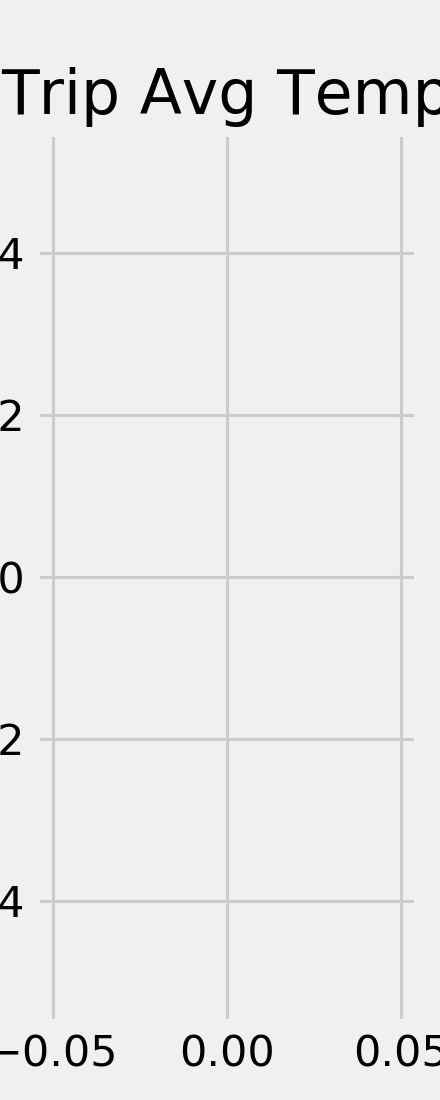

NameError: name 'Measurement' is not defined

In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps("2010-01-01", "2010-12-30")

<IPython.core.display.Javascript object>


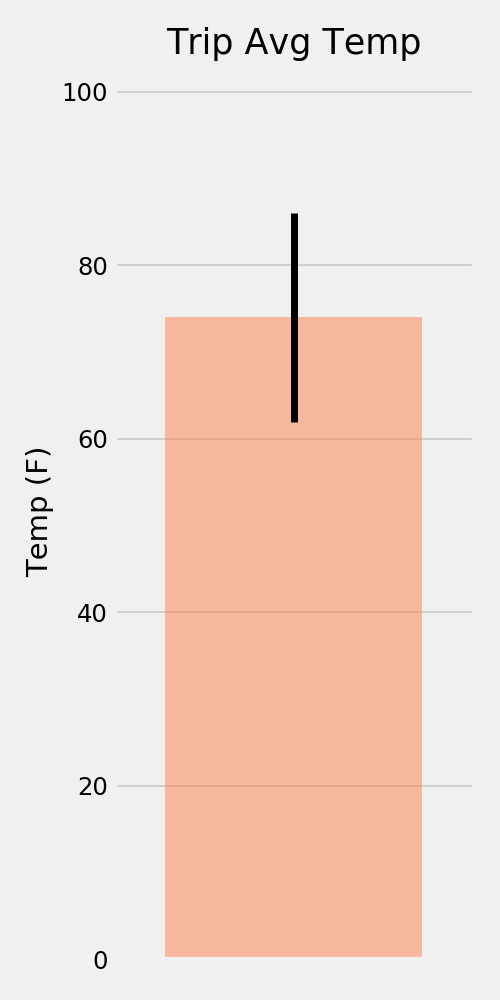

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# TODO


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


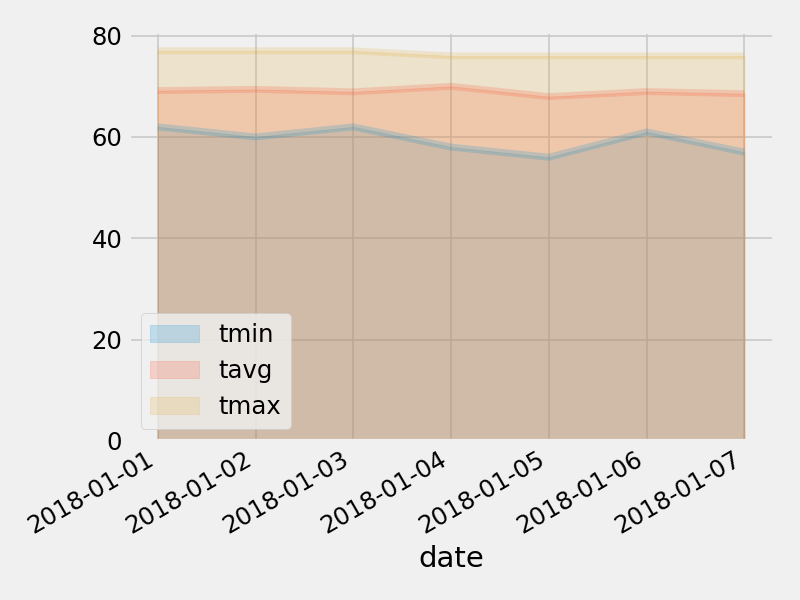

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
